# Week6 Time Series 정규세션 과제

### 주가 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
### Box-Jenkins 방법론
- 식별
- 추정
- 진단
- 예측

## 라이브러리 불러오기

In [1]:
# !pip install yfinance
# !pip install pmdarima

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMAResults

D:\ProgramFiles\Anaconda3-2020.02-Windows-x86_64.exe\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


## 주가 데이터 불러오기
- 예) 삼성 005930.KS

In [3]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


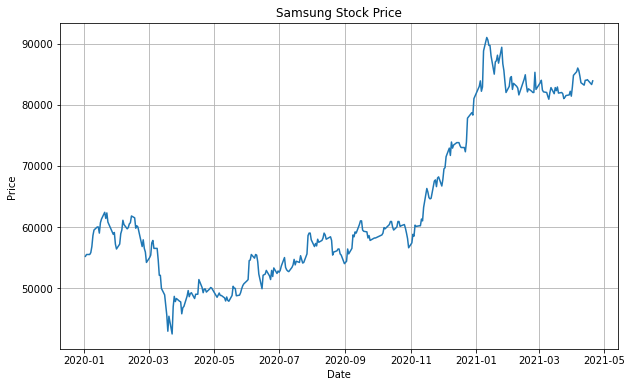

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(samsung_df.index, samsung_df['price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Samsung Stock Price')
plt.grid(True)
plt.show()


### 계절성 분해
- 원본 데이터 그래프
- trend : X
- seasonal : 존재
- resid: 정상성 만족 X

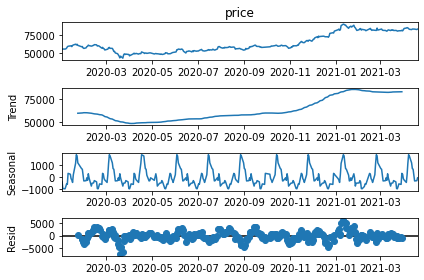

In [5]:
decompose = seasonal_decompose(x = samsung_df['price'], model = "add", period=30) # 계절성 분해
decompose.plot();

### ADF Test
- 시계열 데이터가 정상성을 가지는지 검정하는 방법
    - 정상성 : 시계열 데이터의 통계적 특성(평균, 분산 등)이 시간에 따라 일정하게 유지되는 성질
<br>
<br>
- 출력
    - Test statistic : 검정 통계량; 보다 작은 값이 귀무 가설을 기각하는 데 더 유리함
    - p-value : 귀무 가설을 기각할 수 있는지를 결정하는 값; 일반적으로 p-value가 0.05보다 작으면 귀무 가설을 기각하고 시계열 데이터가 정상성을 가진다고 판단
    - Used lag : 테스트에서 사용된 라그의 수
    - Number of observations used : 테스트에 사용된 관측치의 수
    - Critical values : 중요한 통계적 임계값; 이 값들과 Test statistic을 비교하여 귀무 가설을 기각할지 판단함
    - Maximum information criterion if autolag is not None : 최대 정보 기준값
<br>
<br>
- 결과 해석
    - p-value가 0.937로 0.05보다 크므로 귀무 가설을 기각할 수 없다. 
    - 즉, samsung_df['price'] 시계열 데이터는 정상성을 가지지 않는다고 볼 수 있다.
    - 데이터가 시간의 흐름에 따라 일정한 패턴이나 추세를 가질 가능성이 높다.
    

In [6]:
adfuller(samsung_df['price'])

(-0.21218947966329185,
 0.9370529809409829,
 0,
 321,
 {'1%': -3.450886958636161,
  '5%': -2.870586350823483,
  '10%': -2.5715897843576827},
 5192.408736501805)

### ACF, PACF plot
- ACF : 시차(lag)에 따른 관측치간의 상관관계를 보여준다. 즉, 현재의 데이터 포인트와 특정 시차만큼 떨어진 데이터 포인트 사이의 상관관계를 나타낸다.
- PACF : 다른 시차 사이의 관측치가 주어질 때, 특정 시차에 대한 조건부 상관관계를 보여준다.
<br>
<br>
- 결과 해석
    - ACF : 파란색 영역을 대부분 벗어남 -> 자기 상관 관계 있음, 정상성 X
    - PACF : 자기 상관 관계 없음

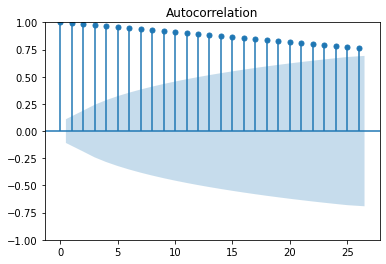

D:\ProgramFiles\Anaconda3-2020.02-Windows-x86_64.exe\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


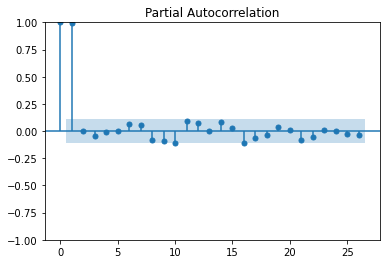

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(samsung_df)
plt.show()

# PACF plot
plot_pacf(samsung_df)
plt.show()


### 1차 차분

In [8]:
import numpy as np

df = samsung_df.diff().dropna()


1차 차분 결과, ACF, PACF 그래프를 통해 자기 상관 관계가 거의 존재하지 않음을 확인할 수 있다.

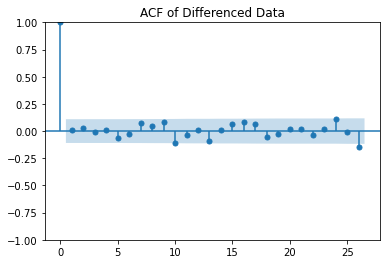

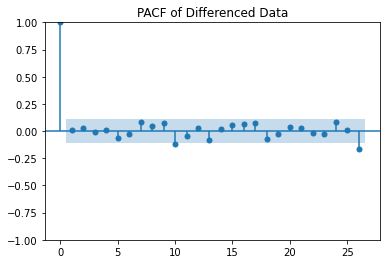

In [9]:
# ACF plot for differenced data
plot_acf(df)
plt.title('ACF of Differenced Data')
plt.show()

# PACF plot for log differenced data
plot_pacf(df)
plt.title('PACF of Differenced Data')
plt.show()


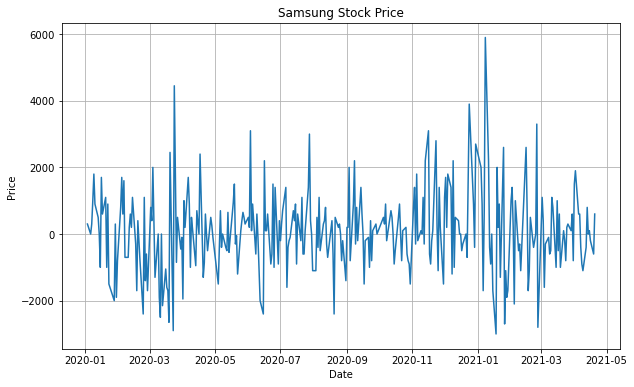

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df.index, df['price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Samsung Stock Price')
plt.grid(True)
plt.show()


### 추정, 진단

In [11]:
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=False)

# 최적 ARIMA model 찾기
best_model = auto_arima(train, seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True, 
                        stepwise=True,start_p=1,start_q=1,
                        max_p=5,max_q=5)

print(best_model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4509.073, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4441.859, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4507.075, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4418.821, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4405.991, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4395.394, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=4390.115, Time=0.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=4388.110, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=4393.386, Time=0.04 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=4358.514, Time=0.32 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=4356.537, T

### 예측

In [12]:
model = auto_arima(train,seasonal=True,  d=1, D=1, m=12, trace=True)
fit = model.fit(train)

forecast = fit.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast.values, columns=['price'], index=test.index)
forecast


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=2.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4428.684, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4294.618, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4355.409, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4272.185, Time=0.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4351.772, Time=0.15 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4254.932, Time=0.81 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4283.371, Time=0.41 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=4248.097, Time=0.92 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4279.2

D:\ProgramFiles\Anaconda3-2020.02-Windows-x86_64.exe\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


,price
day,
2021-01-15,2442.532495
2021-01-18,705.370546
2021-01-19,953.544632
2021-01-20,1133.959042
2021-01-21,45.337526
...,...
2021-04-14,2149.887882
2021-04-15,333.547543
2021-04-16,1831.671265


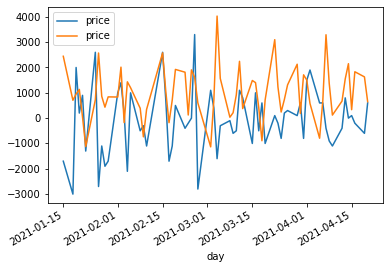

In [13]:
pd.concat([test,forecast],axis=1).plot()
plt.show()

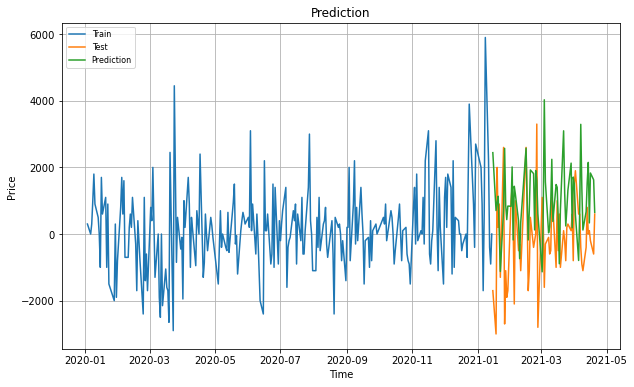

In [14]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Prediction')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=8)
plt.grid(True)
plt.show()